<a href="https://colab.research.google.com/github/wesley28/ProcessamentoDigitalDeImagens/blob/main/Equaliza%C3%A7%C3%A3o_Att_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image


class EqulizacaoHistograma:


  def __init__(self, path):
    self.path = path


  def read_image(self):
    im = Image.open(self.path)
    self.image = np.array(im)


  def save_image(self, file_name, image):
    image = Image.fromarray(image)
    image.save('{}.jpeg'.format(file_name))


  def _valor_equalizado(self, index):
    if index == 0:
      return self.L * (self.dct_counts[index] / self.MN)

    else:
      return self.L * (self.dct_counts[index] / self.MN) + self._valor_equalizado(index-1)


  def _frequency_pixel(self):
    unique, counts = np.unique(self.image, return_counts=True)
    return unique, counts


  def _generate_dct(self, values):
    dct = {}
    for i, value in enumerate(values):
      dct[i] = value

    return dct


  def equalizacao_histograma(self, name):
    self.MN = self.image.shape[0] * self.image.shape[1]
    self.L = 255
    unique, counts = self._frequency_pixel()
    self.dct_counts = self._generate_dct(counts)
    dct_equalized_values = {}
    for i in range(len(self.dct_counts)):
      dct_equalized_values[unique[i]] = round(self._valor_equalizado(i))

    self.dct_equalized_values = dct_equalized_values
    lt_values = [j for i in eh.image.reshape(250000, 1).tolist() for j in i]
    lt_normalizad_values = np.array([dct_equalized_values[value] for value in lt_values], dtype='uint8')
    self.normalized_image = lt_normalizad_values.reshape(self.image.shape[0], self.image.shape[1])
    #self.save_image(name+'_original_image', self.image)
    self.save_image(name+'_normalized_image', self.normalized_image)



# **Equalização **

In [ ]:
eh = EqulizacaoHistograma('/content/Fig0316(1)(top_left).tif')
eh.read_image()
eh.equalizacao_histograma('top_left')

In [ ]:
eh = EqulizacaoHistograma('/content/Fig0316(2)(2nd_from_top).tif')
eh.read_image()
eh.equalizacao_histograma('2_from_top')

In [ ]:
eh = EqulizacaoHistograma('/content/Fig0316(3)(third_from_top).tif')
eh.read_image()
eh.equalizacao_histograma('3_from_top')

In [ ]:
eh = EqulizacaoHistograma('/content/Fig0316(4)(bottom_left).tif')
eh.read_image()
eh.equalizacao_histograma('bottom_left')

# **Histograma**

In [ ]:
def plot_hist(image_name):

  import cv2
  import matplotlib.pyplot as plt

  image = cv2.imread("/content/top_left_normalized_image.jpeg")

  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  hist = cv2.calcHist([gray_image], [0], None, [256], [0, 255])

  plt.plot(hist)
  plt.xlabel("Níveis de cinza")
  plt.ylabel("Frequência")
  plt.show()

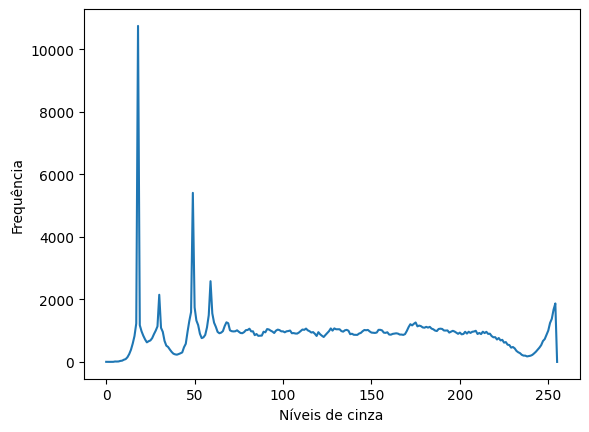

In [ ]:
import numpy as np
image = np.random.randint(0, 255, (200, 200, 3))

plot_hist(image)